In [1]:
#requirements - which feature is most imp in prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data_cardiovascular_risk.csv')

In [4]:
df.head(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0


In [5]:
df.shape

(3390, 17)

In [6]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [8]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [9]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [10]:
df.describe(include='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


Text(0.5, 1.0, 'Count missing values (test data)')

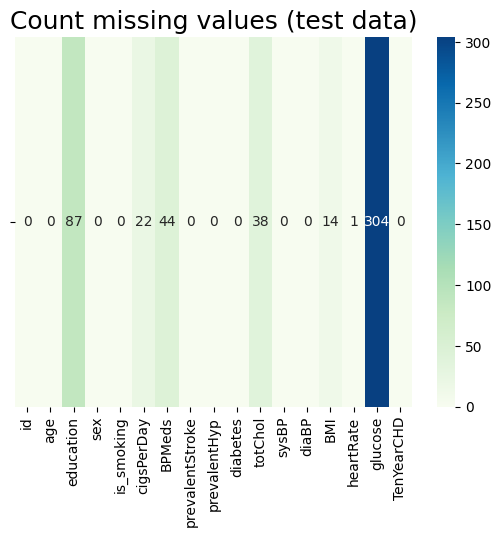

In [11]:
sns.heatmap((df.isna().sum()).to_frame(name='').T,cmap='GnBu', annot=True,
             fmt='0.0f').set_title('Count missing values (test data)', fontsize=18)

Text(0.5, 1.0, 'Count missing values (test data)')

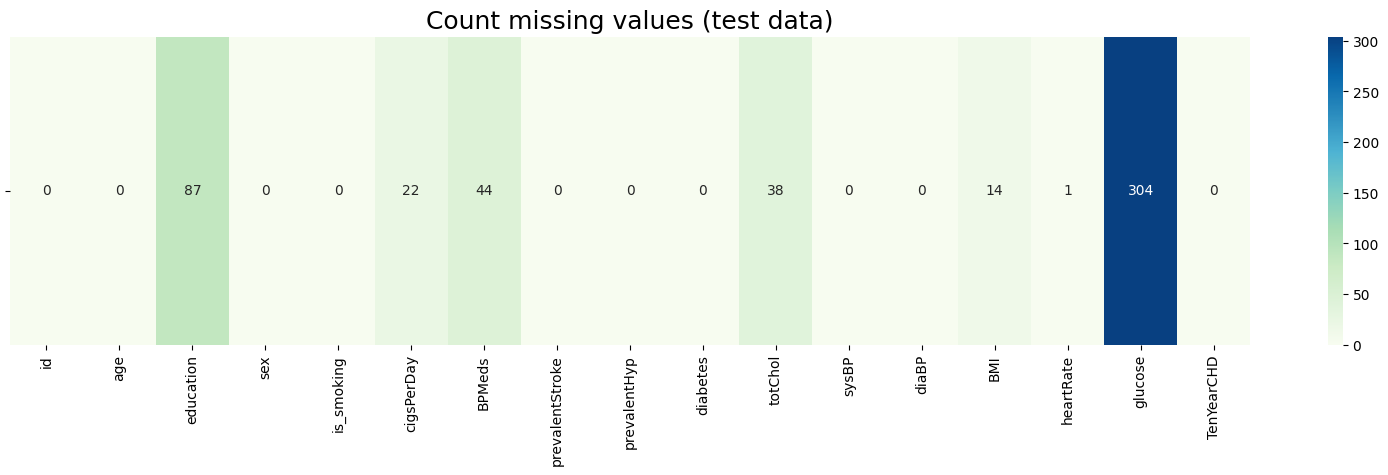

In [12]:
plt.figure(figsize=(20,4))
sns.heatmap((df.isna().sum()).to_frame(name='').T,cmap='GnBu', annot=True,
             fmt='0.0f').set_title('Count missing values (test data)', fontsize=18)

In [13]:
# plt.figure(figsize=(20,3))
# sns.heatmap((df.isna().sum()),cmap='RdBu', annot=True).set_title('Count missing values (test data)', fontsize=20)

Text(0.5, 1.0, 'Count missing values (test data)')

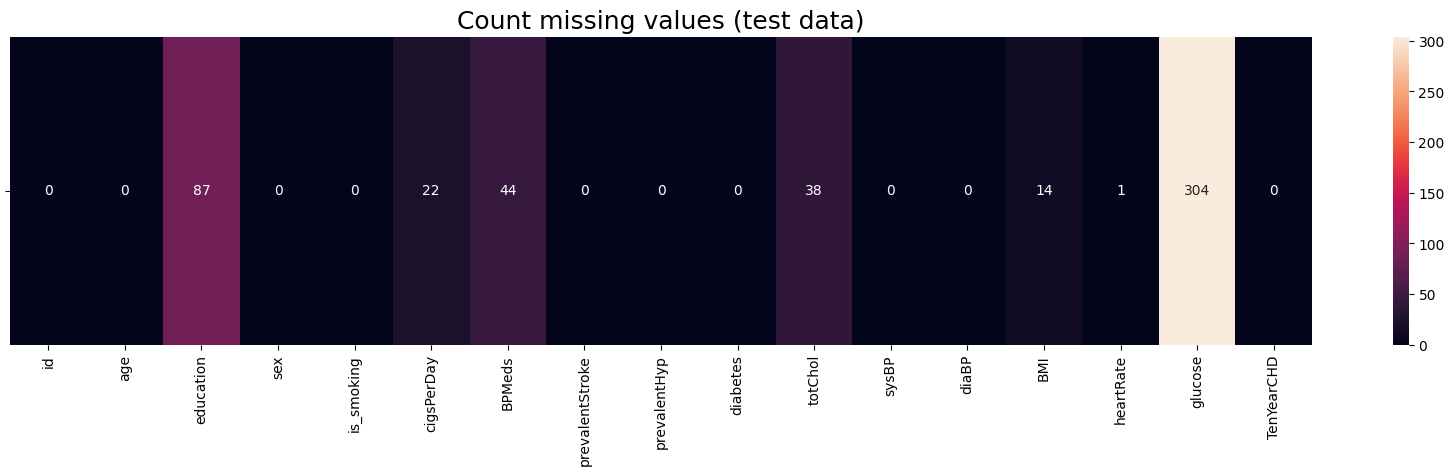

In [14]:
plt.figure(figsize=(21,4))
sns.heatmap((df.isna().sum()).to_frame(name='').T,cmap='rocket', annot=True,
             fmt='0.0f').set_title('Count missing values (test data)', fontsize=18)

In [15]:
df.isnull().sum()/df.shape[0]*100

id                 0.000000
age                0.000000
education          2.566372
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.648968
BPMeds             1.297935
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.120944
sysBP              0.000000
diaBP              0.000000
BMI                0.412979
heartRate          0.029499
glucose            8.967552
TenYearCHD         0.000000
dtype: float64

In [16]:
#to give a proper dataframe type
(df.isnull().sum()/df.shape[0]*100).to_frame()

,0
id,0.000000
age,0.000000
education,2.566372
sex,0.000000
is_smoking,0.000000
cigsPerDay,0.648968
BPMeds,1.297935
prevalentStroke,0.000000
prevalentHyp,0.000000
diabetes,0.000000


In [17]:
#Rename 0 to percentage
(df.isnull().sum()/df.shape[0]*100).to_frame().rename(columns={0:'Percentage'})

,Percentage
id,0.000000
age,0.000000
education,2.566372
sex,0.000000
is_smoking,0.000000
cigsPerDay,0.648968
BPMeds,1.297935
prevalentStroke,0.000000
prevalentHyp,0.000000
diabetes,0.000000


In [18]:
for col in df:
    a = df[col].unique()
    print(col,':\n',a)

id :
 [   0    1    2 ... 3387 3388 3389]
age :
 [64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]
education :
 [ 2.  4.  1.  3. nan]
sex :
 ['F' 'M']
is_smoking :
 ['YES' 'NO']
cigsPerDay :
 [ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]
BPMeds :
 [ 0. nan  1.]
prevalentStroke :
 [0 1]
prevalentHyp :
 [0 1]
diabetes :
 [0 1]
totChol :
 [221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164. 226. 248. 245. 279. 273. 252.
 198. 266. 216. 237. 193. 293. 180. 206. 215. 208. 262. 270. 292. 346.
 202. 340. 334. 351. 235. 243. 196. 275. 186. 190. 268. 234. 264. 156.
 260. 225. 183. 246. 174. 288. 254. 150. 211. 161. 274. 214. 195. 165.
 302. 265. 251. 205. 209. 258. 222. 247. 189. 173. 281. 382. 181. 200.
 244. 218. 261. 229. 291. 312. 170. 176. 290. 204. 239. 162. 314. 194.
 271. 

<Axes: xlabel='cigsPerDay', ylabel='Count'>

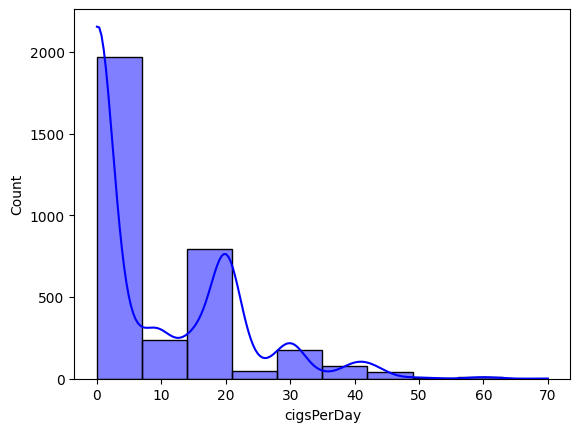

In [19]:
sns.histplot(df['cigsPerDay'], kde=True, color='blue', bins=10)


<Axes: xlabel='BPMeds', ylabel='Count'>

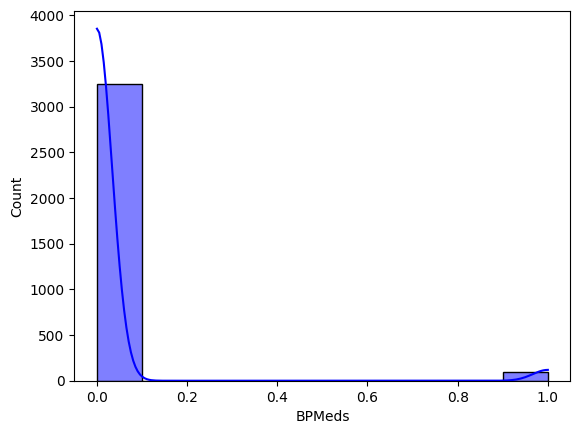

In [20]:
sns.histplot(df['BPMeds'], kde=True, color='blue', bins=10)


<Axes: xlabel='totChol', ylabel='Count'>

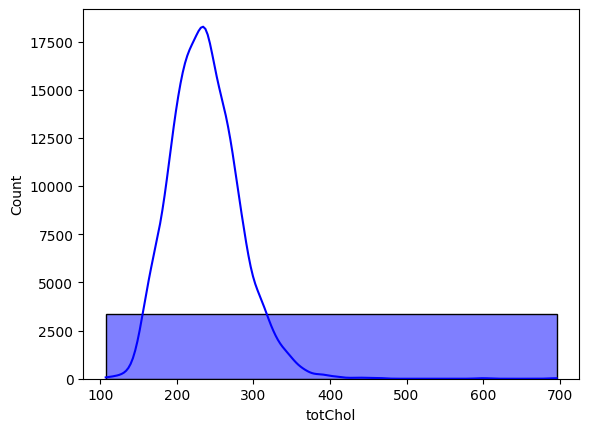

In [21]:
sns.histplot(df['totChol'], kde=True, color='blue', bins=1)

<Axes: xlabel='BMI', ylabel='Count'>

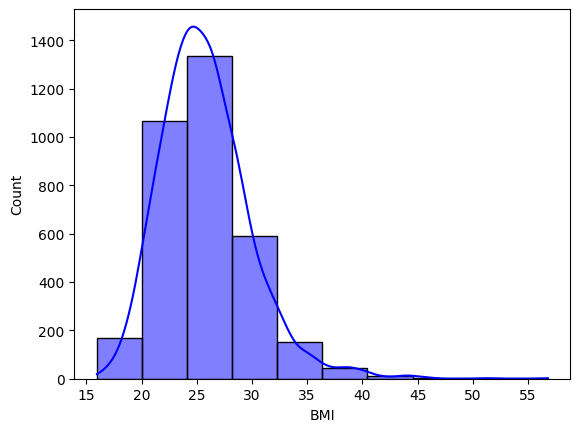

In [22]:
sns.histplot(df['BMI'], kde=True, color='blue', bins=10)


<Axes: xlabel='heartRate', ylabel='Count'>

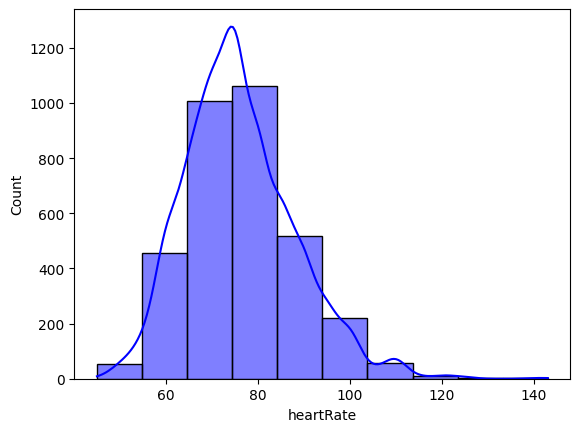

In [23]:
sns.histplot(df['heartRate'], kde=True, color='blue', bins=10)


<Axes: xlabel='glucose', ylabel='Count'>

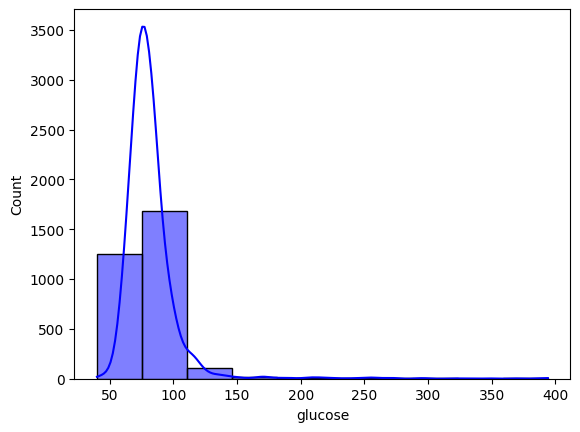

In [24]:
sns.histplot(df['glucose'], kde=True, color='blue', bins=10)

<Axes: xlabel='TenYearCHD', ylabel='Count'>

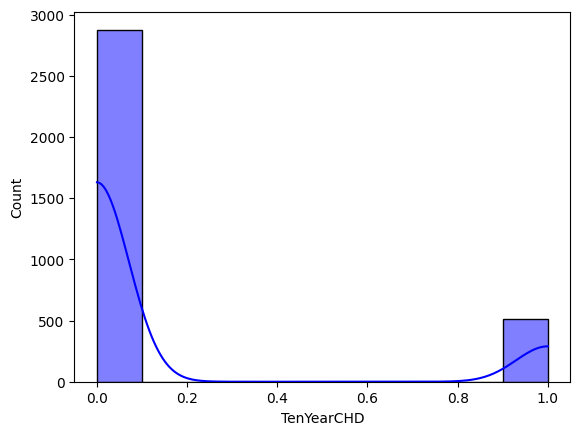

In [25]:
sns.histplot(df['TenYearCHD'], kde=True, color='blue', bins=10)

In [26]:
#Categorical - mode/max , numerical - medium
df['education'].fillna(df['education'].value_counts().idxmax(), inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)
df['BPMeds'].fillna(df['BPMeds'].value_counts().idxmax(), inplace=True)
df['totChol'].fillna(df['totChol'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['heartRate'].fillna(df['heartRate'].median(), inplace=True)
df['glucose'].fillna(df['glucose'].median(), inplace=True)

In [27]:
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [28]:
df.rename(columns={'sex':'gender','prevalentHyp':'prevalent_Hypertension'}, inplace=True)


In [29]:
df.columns


Index(['id', 'age', 'education', 'gender', 'is_smoking', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalent_Hypertension', 'diabetes',
       'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD'],
      dtype='object')

In [30]:
df['is_smoking'].unique()


array(['YES', 'NO'], dtype=object)

In [31]:
data = df.copy()
data['gender'] = data.gender.replace(['M','F'],[0,1])
data['is_smoking'] = data.is_smoking.replace(['YES', 'NO'],[1,0])

In [32]:
data

,id,age,education,gender,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalent_Hypertension,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,1,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,1,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,1,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,1,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,0,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,0,0,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [33]:
data.drop(['id'],axis=1,inplace=True)

In [34]:
data.corr()

,age,education,gender,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalent_Hypertension,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
age,1.000000,-0.170614,0.041882,-0.210997,-0.191465,0.122114,0.059038,0.308826,0.107875,0.271961,0.404845,0.221896,0.137478,-0.002636,0.112395,0.224927
education,-0.170614,1.000000,-0.025275,0.030193,0.014078,-0.019880,-0.031820,-0.081925,-0.051895,-0.021221,-0.132202,-0.060774,-0.135783,-0.039395,-0.039303,-0.051388
gender,0.041882,-0.025275,1.000000,-0.215485,-0.329308,0.043191,0.011273,-0.003072,-0.008853,0.070042,0.037369,-0.058840,-0.087093,0.118707,0.003016,-0.084647
is_smoking,-0.210997,0.030193,-0.215485,1.000000,0.763273,-0.037533,-0.043703,-0.119325,-0.053333,-0.047004,-0.145721,-0.124318,-0.172707,0.062152,-0.059353,0.034143
cigsPerDay,-0.191465,0.014078,-0.329308,0.763273,1.000000,-0.035727,-0.041576,-0.078003,-0.048114,-0.025346,-0.100348,-0.068320,-0.099830,0.066229,-0.066374,0.068020
BPMeds,0.122114,-0.019880,0.043191,-0.037533,-0.035727,1.000000,0.116183,0.256892,0.070932,0.080918,0.260384,0.198780,0.087648,0.018107,0.061356,0.087349
prevalentStroke,0.059038,-0.031820,0.011273,-0.043703,-0.041576,0.116183,1.000000,0.071652,0.010115,-0.010769,0.057568,0.047235,0.017032,-0.019183,0.023662,0.068627
prevalent_Hypertension,0.308826,-0.081925,-0.003072,-0.119325,-0.078003,0.256892,0.071652,1.000000,0.082565,0.158693,0.699285,0.612897,0.299615,0.150731,0.082962,0.166544
diabetes,0.107875,-0.051895,-0.008853,-0.053333,-0.048114,0.070932,0.010115,0.082565,1.000000,0.059194,0.124011,0.061165,0.087793,0.039746,0.609743,0.103681
totChol,0.271961,-0.021221,0.070042,-0.047004,-0.025346,0.080918,-0.010769,0.158693,0.059194,1.000000,0.197848,0.153825,0.113452,0.086955,0.060913,0.093605


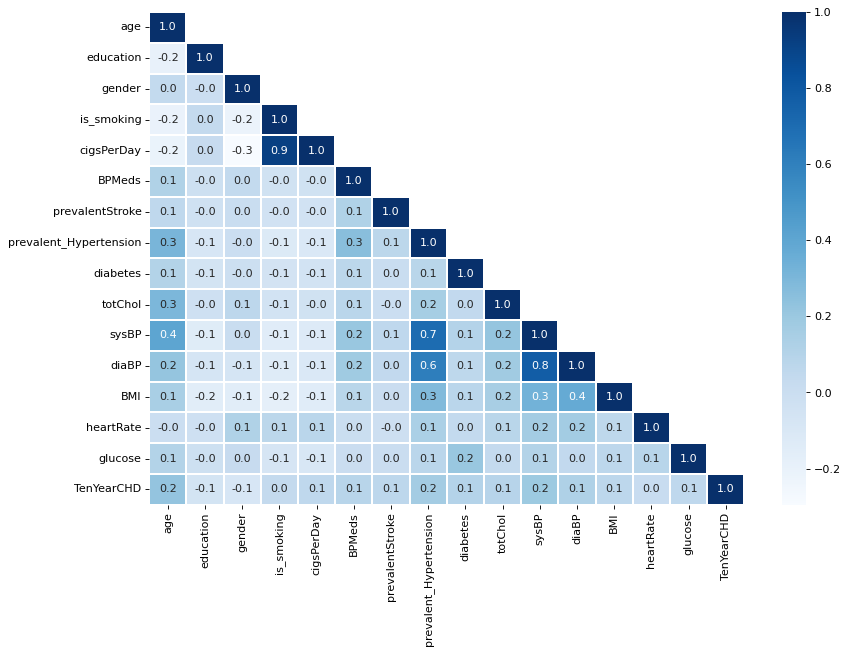

In [35]:
target_var = 'TenYearCHD'
df_ordered = pd.concat([data.drop(target_var,axis=1), df[target_var]],axis=1)
corr = df_ordered.corr(method='spearman')

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

# Plot the heatmap correlation
plt.figure(figsize=(12,8), dpi=80)
sns.heatmap(corr, mask=mask, annot=True, cmap='Blues', fmt='.1f', linewidths=0.2)
plt.show()

In [36]:
categorical=['gender','is_smoking','BPMeds','prevalentStroke','prevalent_Hypertension','diabetes','TenYearCHD']

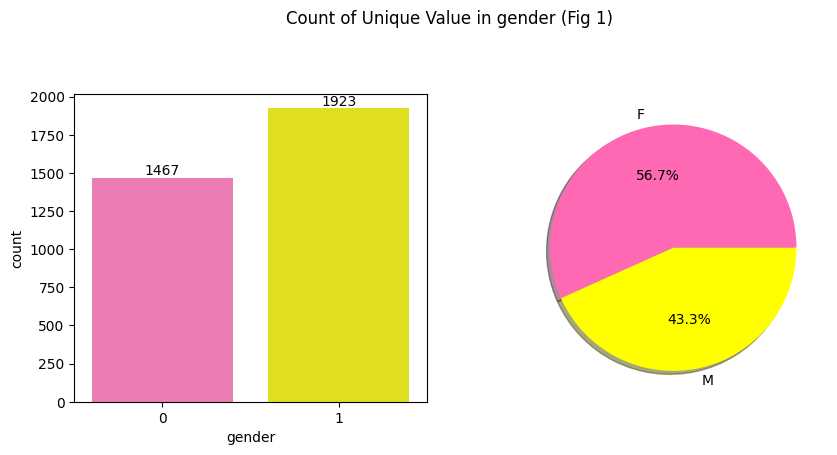

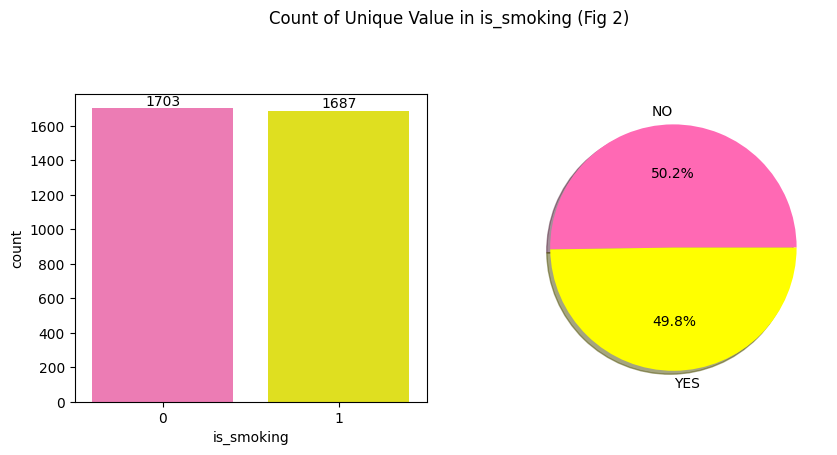

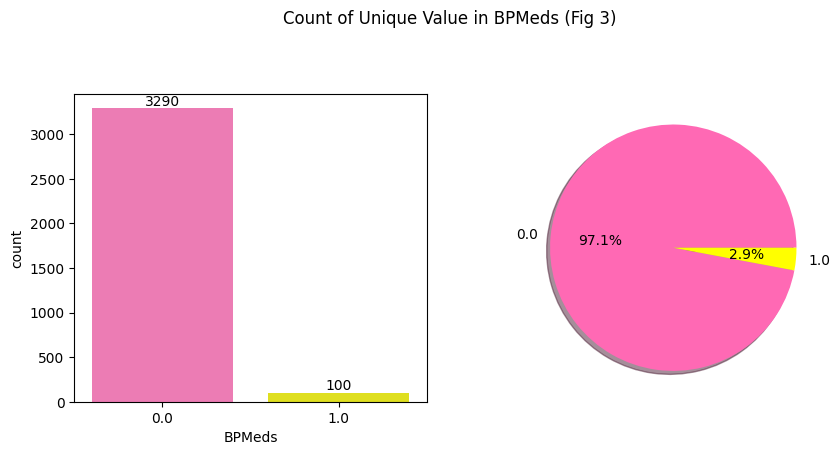

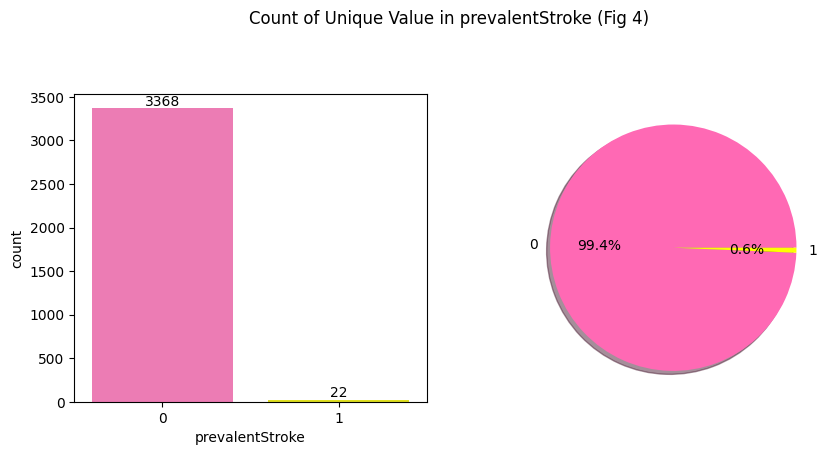

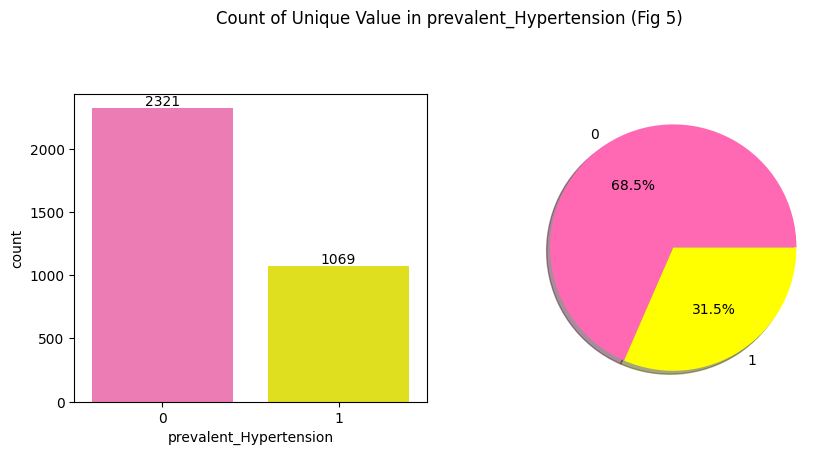

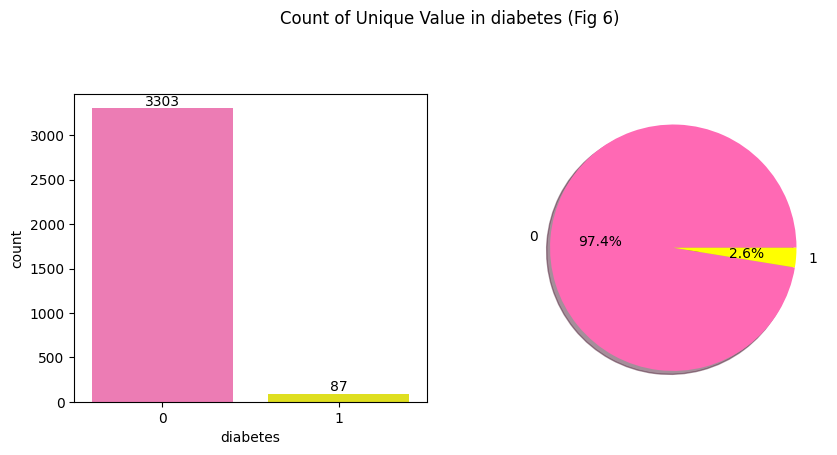

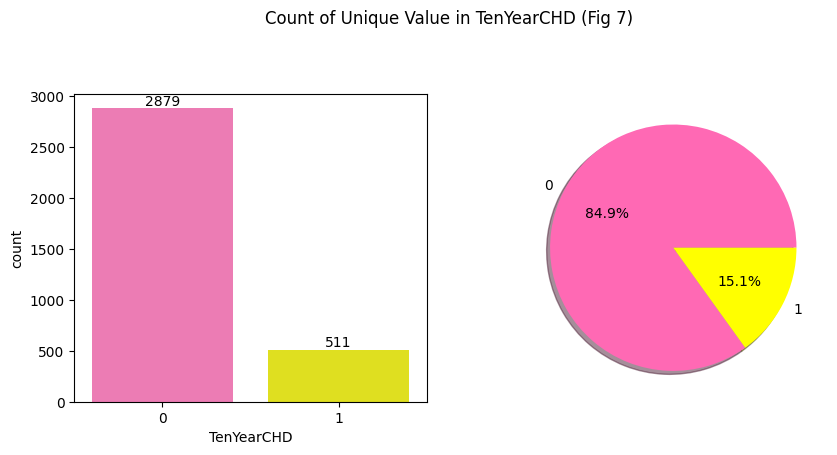

In [37]:
sns.set_palette(['hotpink', 'yellow'])
for i, col in enumerate(categorical):

    fig, axes = plt.subplots(1,2,figsize=(10,4))

    # count of col (countplot)
    sns.countplot(data=data, x=col, ax=axes[0])
    for container in axes[0].containers:
        axes[0].bar_label(container)
    # count of col (pie chart)
    slices = df[col].value_counts().sort_index().values
    activities = [var for var in df[col].value_counts().sort_index().index]
    axes[1].pie(slices, labels=activities, shadow=True, autopct='%1.1f%%')

    plt.suptitle(f'Count of Unique Value in {col} (Fig {i+1})', y=1.09)
    plt.show()

In [38]:
numerical= ['prevalent_Hypertension','totChol','sysBP','diaBP','BMI','heartRate','glucose','cigsPerDay']
Target='TenYearCHD'


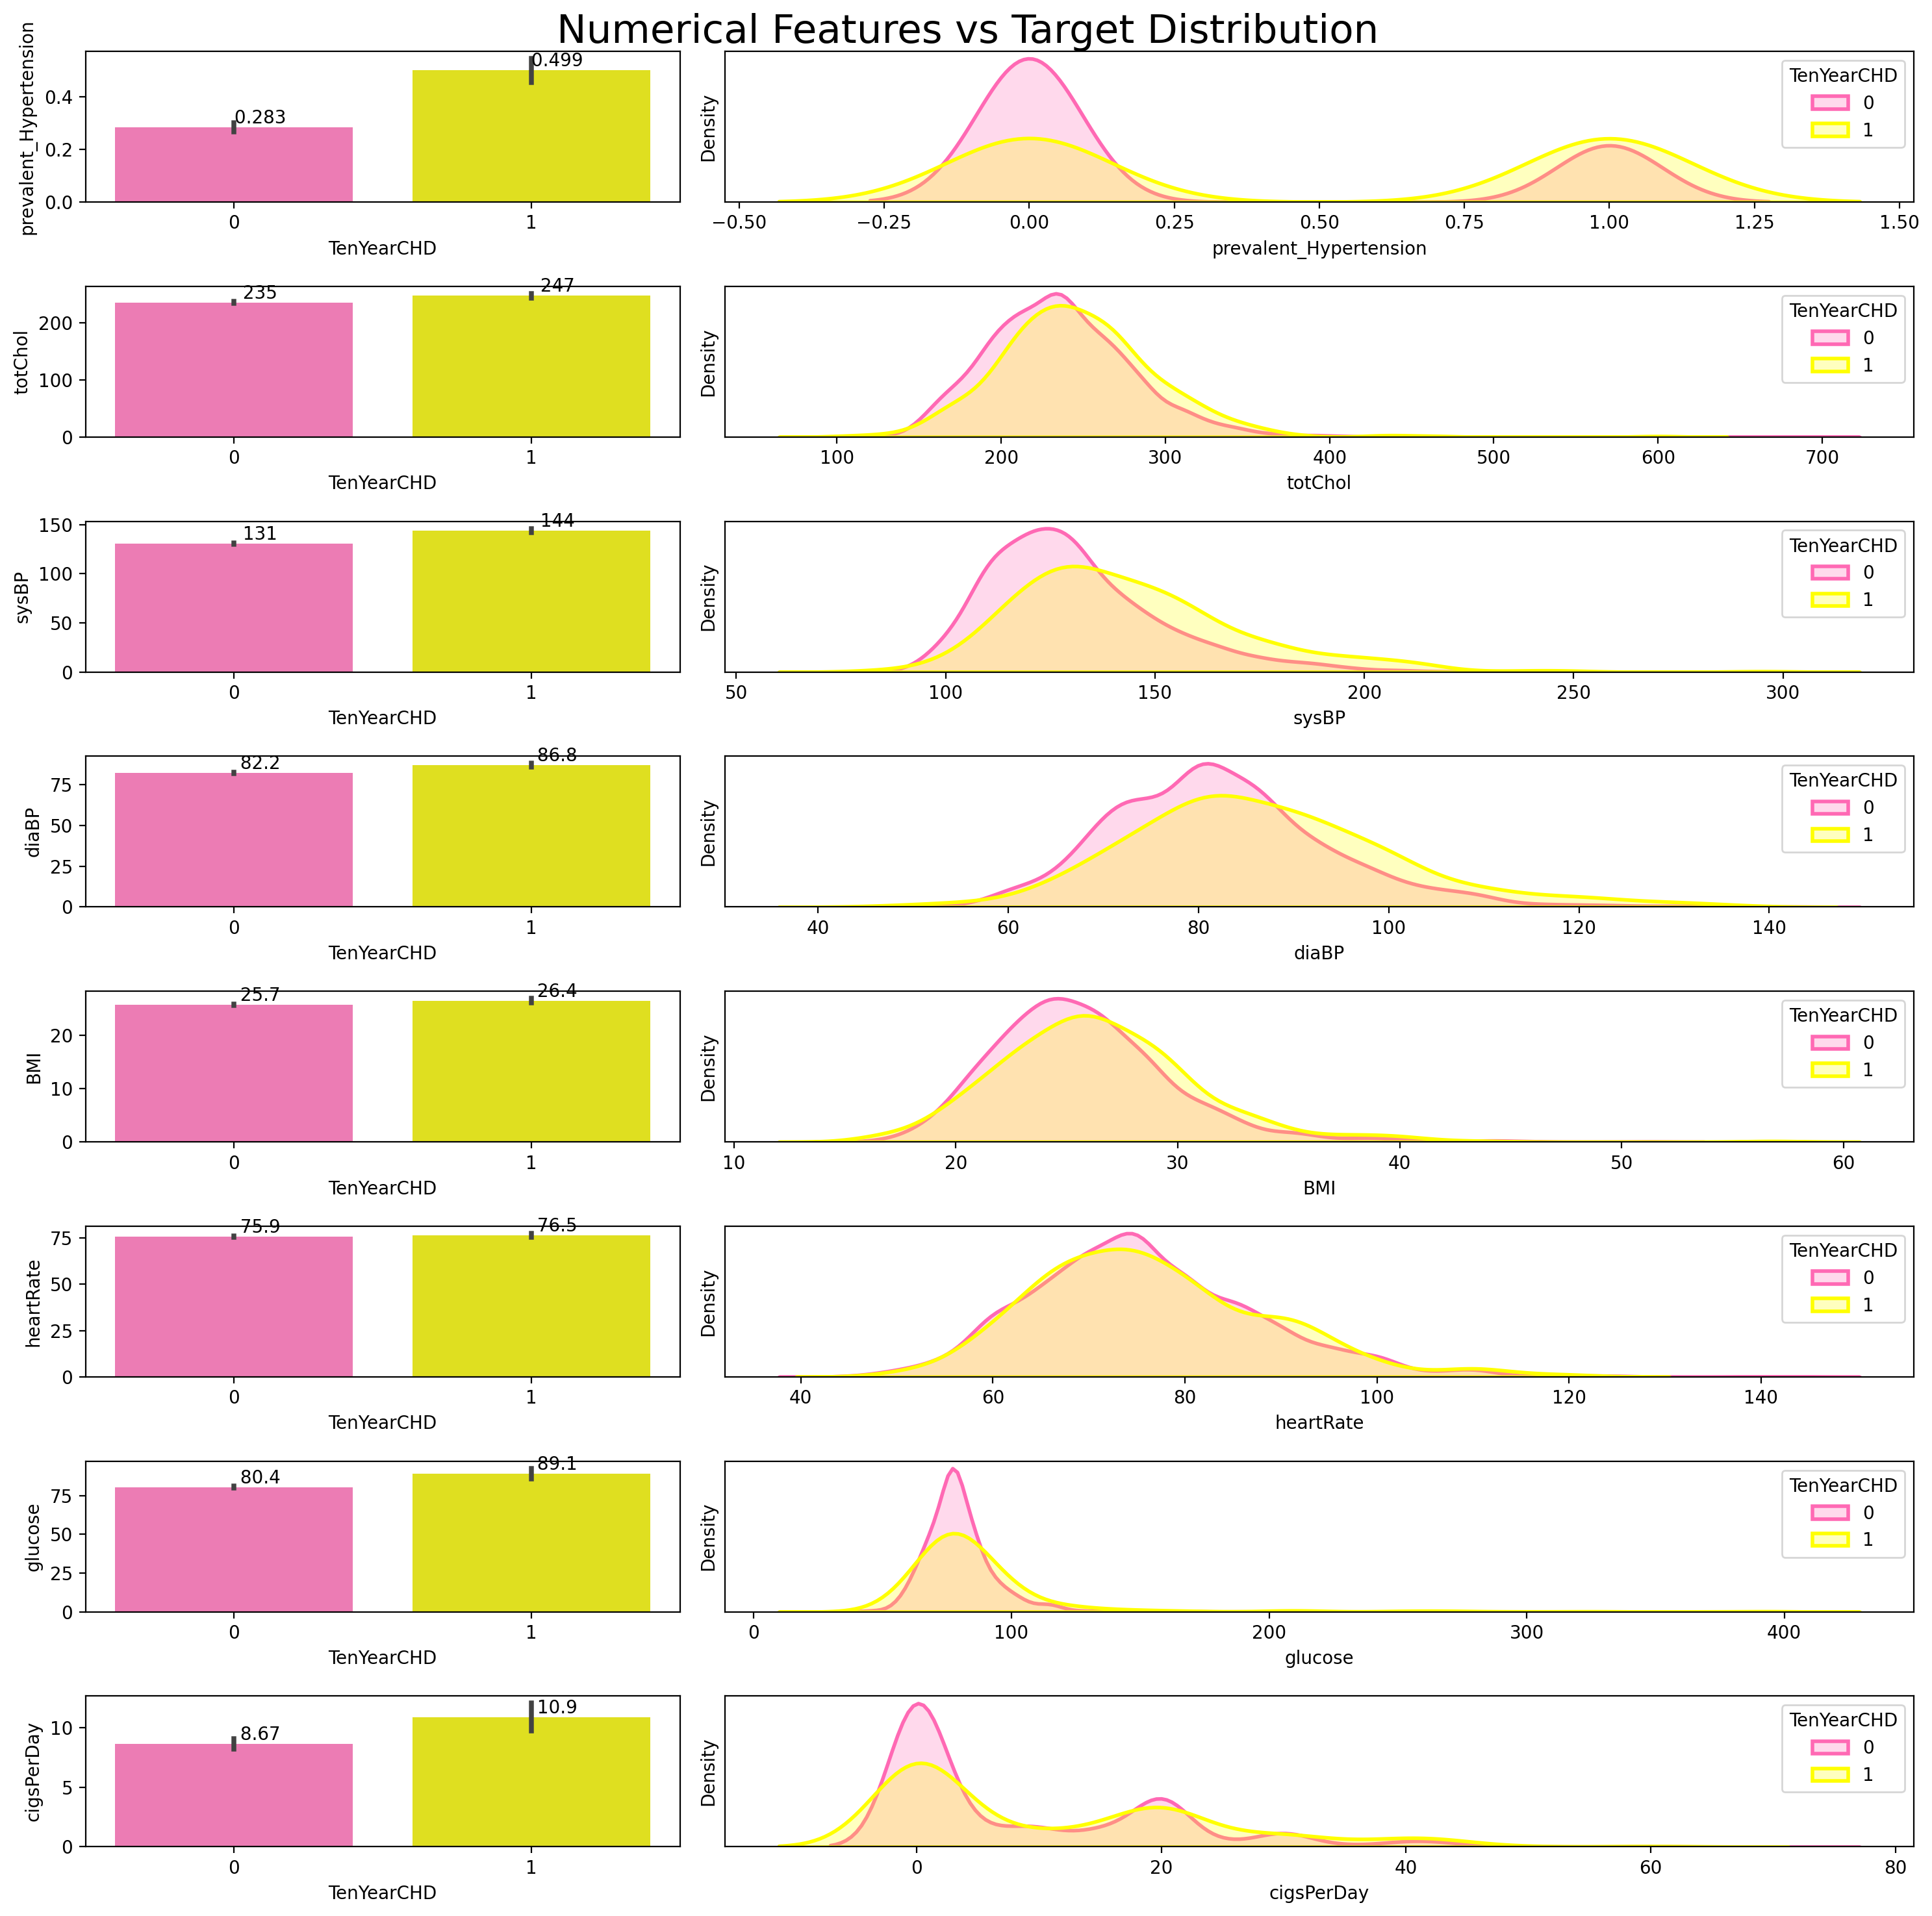

In [39]:
sns.set_palette(['hotpink', 'yellow'])

fig, ax = plt.subplots(8, 2, figsize=(15,15), dpi=200, gridspec_kw={'width_ratios': [1, 2]})

for i,col in enumerate(numerical):
    # barplot
    graph = sns.barplot(data=data, x=Target, y=col, ax=ax[i,0])
    # kde Plot
    sns.kdeplot(data=data[data[Target]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=data[data[Target]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='TenYearCHD', loc='upper right')
    # Add bar sizes to our plot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')
        
plt.suptitle('Numerical Features vs Target Distribution', fontsize=22)
plt.tight_layout()                     
plt.show()

In [40]:
num_cols = pd.DataFrame (data, columns= ['gender','is_smoking','BPMeds','prevalentStroke','prevalent_Hypertension','diabetes','TenYearCHD'])
cat_cols = pd.DataFrame (data, columns= ['prevalent_Hypertension','totChol','sysBP','diaBP','BMI','heartRate','glucose','cigsPerDay'])

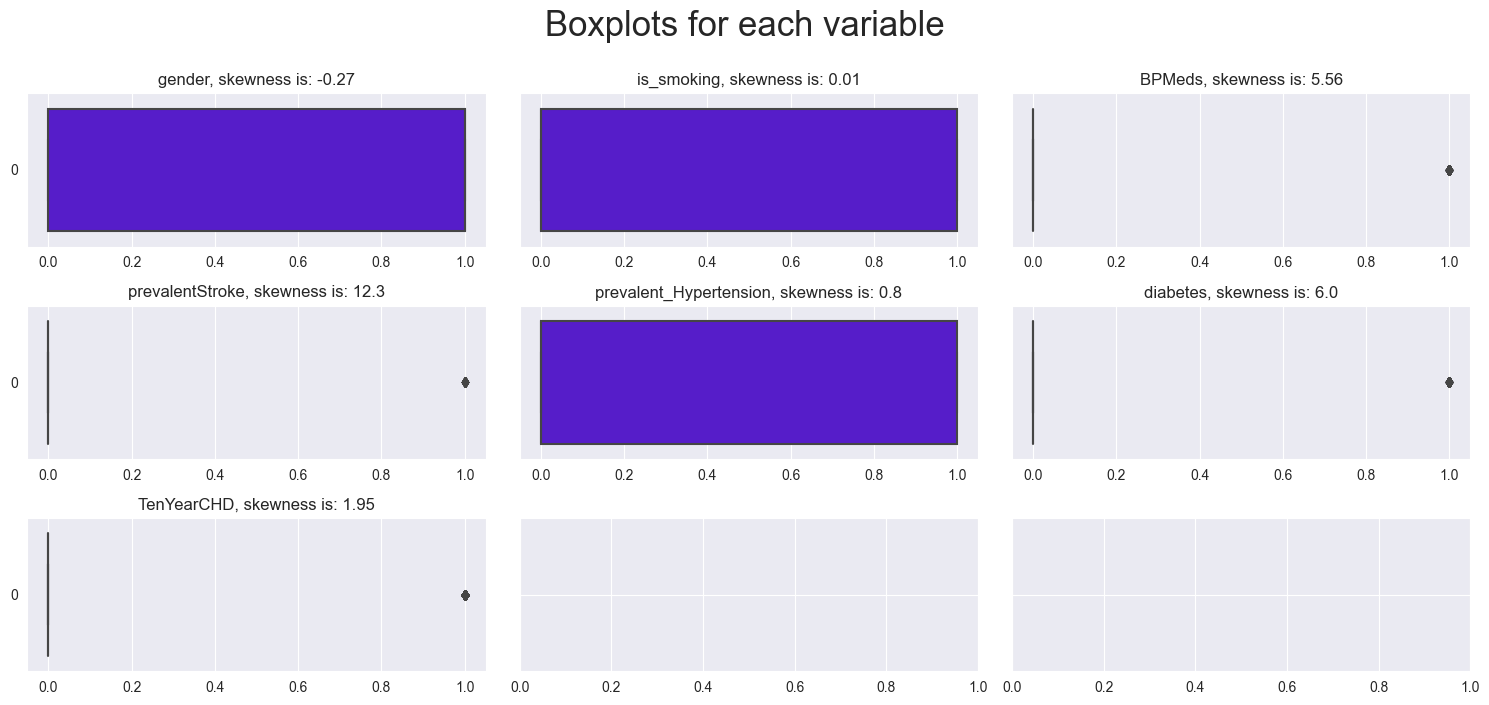

In [42]:
# Visualizing the Numerical Features by boxplots
sns.set_style('darkgrid')
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(15,7))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', color ='#4c00e6', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True), 2)))
        
boxplots_custom(dataset=data, columns_list=num_cols, rows=3, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

In [43]:
# Calculate the IQR for each column in the dataset
Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = ((num_cols < (Q1 - 1.5 * IQR)) | (num_cols > (Q3 + 1.5 * IQR)))

# Count the number of outliers for each variable
num_outliers = outliers.sum()

# Number of outliers for each variable
num_outliers.to_frame().T

,gender,is_smoking,BPMeds,prevalentStroke,prevalent_Hypertension,diabetes,TenYearCHD
0,0,0,100,22,0,87,511


In [51]:
# Separate numerical and categorical features into different lists
numerical_columns = list(data.loc[:,['gender','is_smoking','BPMeds','prevalentStroke','prevalent_Hypertension','diabetes','TenYearCHD']])
categorical_columns = list(data.loc[:,['prevalent_Hypertension','totChol','sysBP','diaBP','BMI','heartRate','glucose','cigsPerDay']])

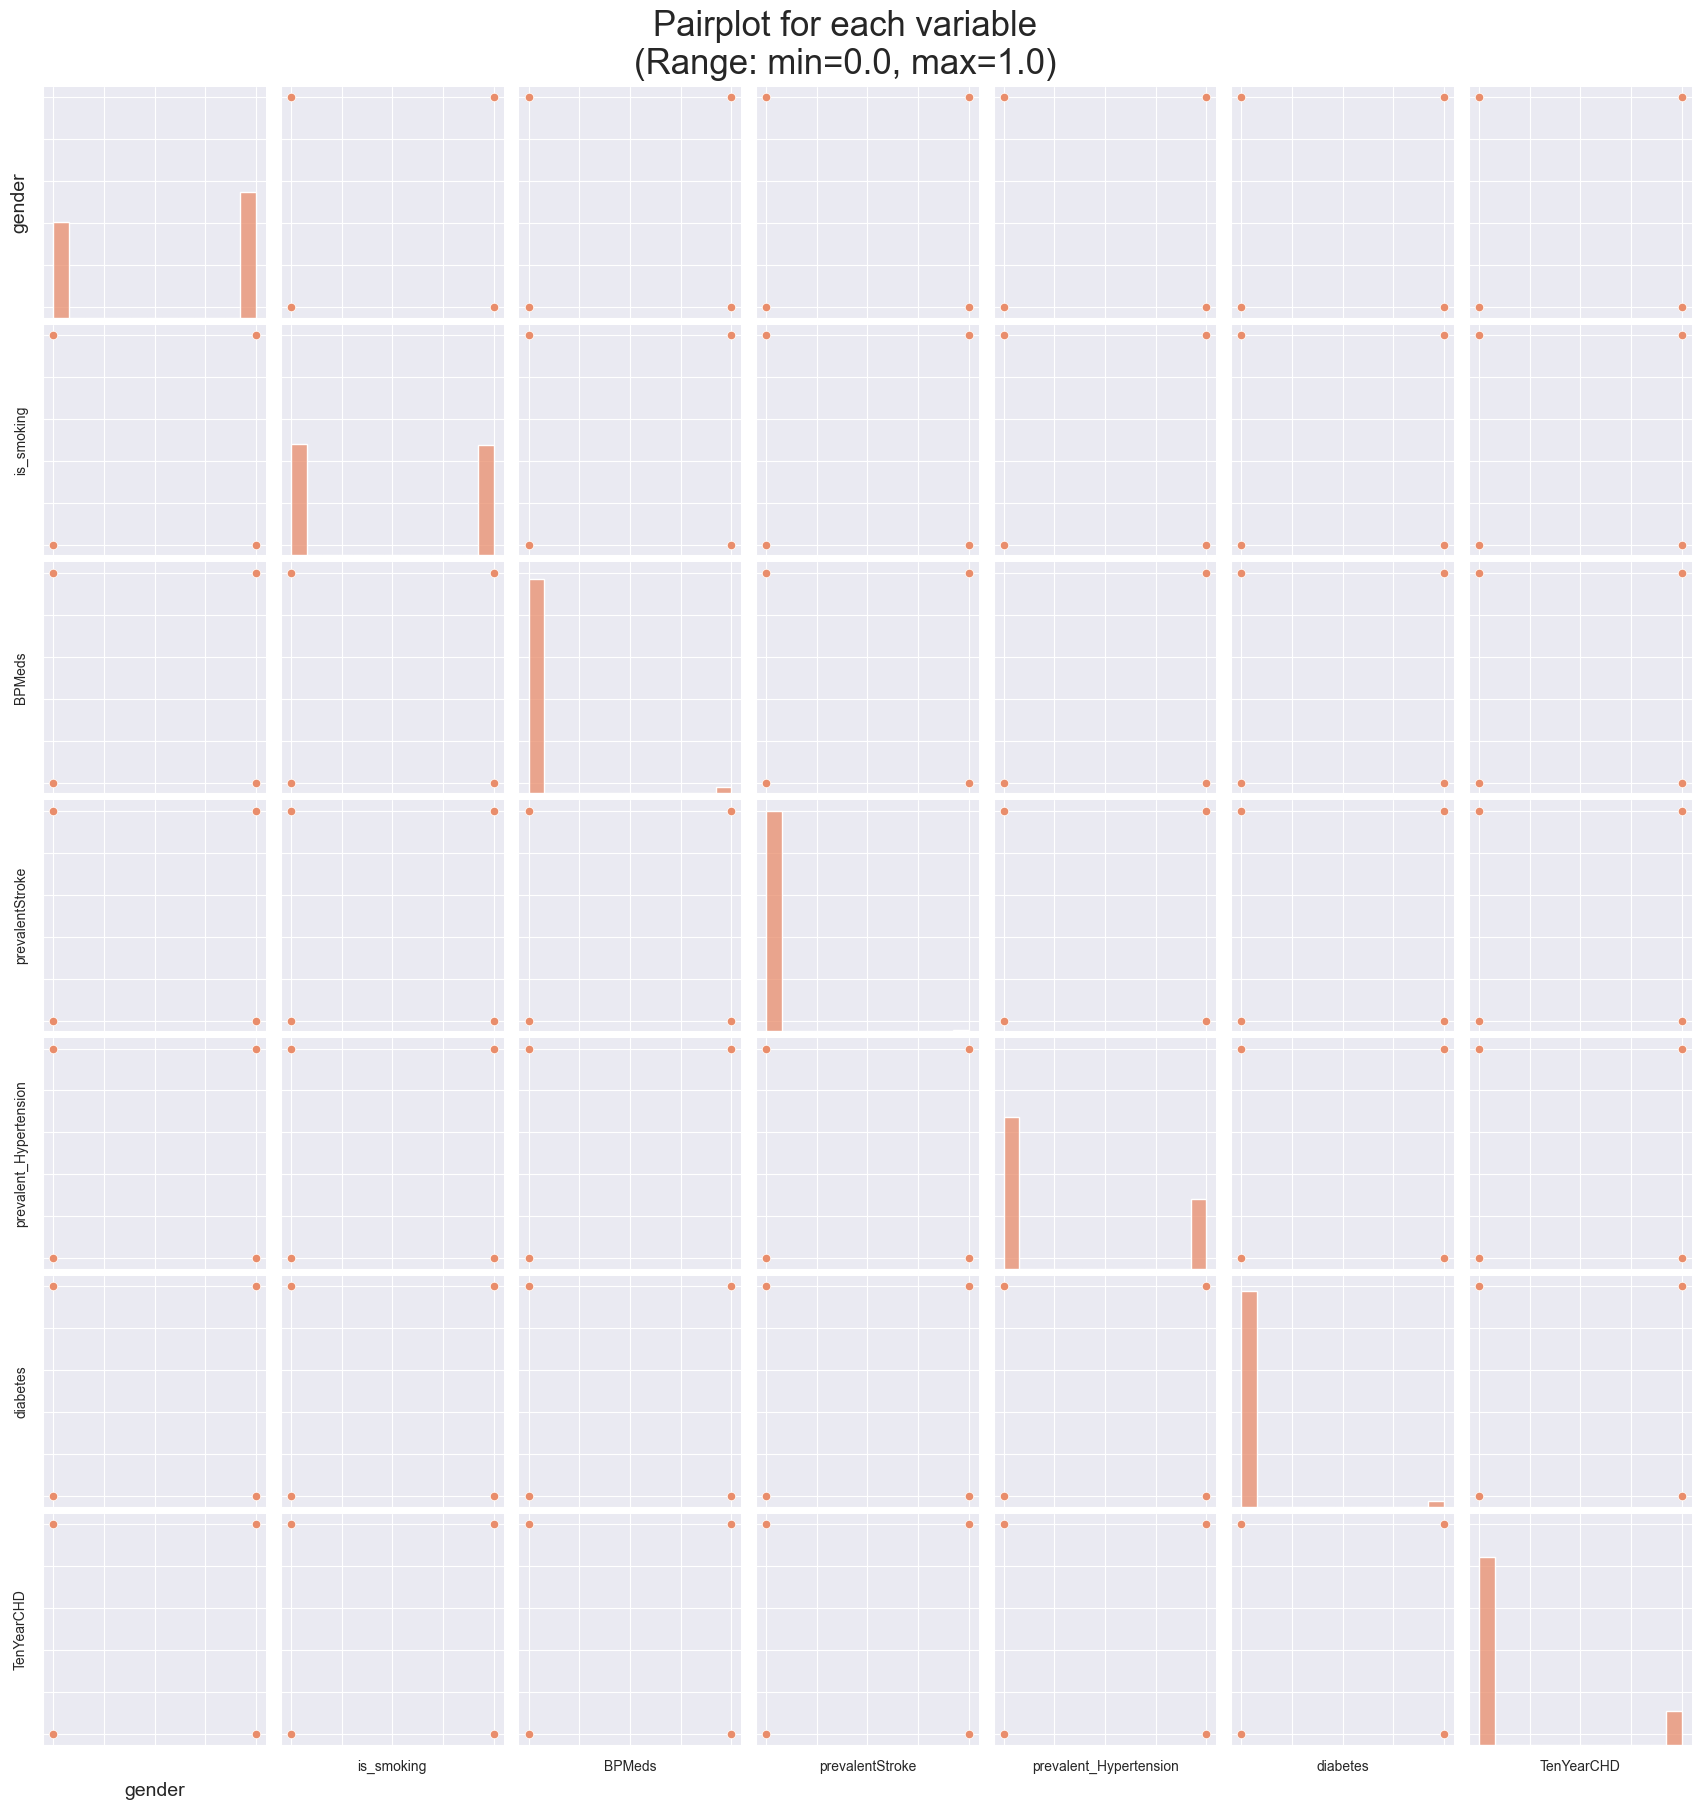

In [58]:
# Check noises by pairplot
sns.set_palette('flare')
dnp = sns.pairplot(data.loc[:, numerical_columns])

# Add axis labels and tick labels to the plot
dnp.set(xticklabels=[], yticklabels=[])
dnp.axes[0][0].set_ylabel(numerical_columns[0], fontsize=14)
dnp.axes[-1][0].set_xlabel(numerical_columns[0], fontsize=14)
dnp.axes[-1][0].xaxis.labelpad = 20
dnp.axes[-1][-1].yaxis.labelpad = 20

# Title of the plot
dnp.fig.suptitle('Pairplot for each variable\n(Range: min={}, max={})'.format(data[numerical_columns].min().min(), data[numerical_columns].max().max()), y=1.03, fontsize=25)

# Show the plot
plt.show()

In [68]:
pd.to_numeric(df.TenYearCHD,errors='coerce')

0       1
1       0
2       0
3       1
4       0
       ..
3385    0
3386    0
3387    1
3388    0
3389    0
Name: TenYearCHD, Length: 3390, dtype: int64

In [70]:
pd.to_numeric(data.TenYearCHD,errors='coerce')

0       1
1       0
2       0
3       1
4       0
       ..
3385    0
3386    0
3387    1
3388    0
3389    0
Name: TenYearCHD, Length: 3390, dtype: int64

In [73]:
df['TenYearCHD'].value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of TenYearCHD
0    2879
1     511
Name: count, dtype: int64>

In [74]:
negative = data[data.TenYearCHD == 0]
positive = data[data.TenYearCHD == 1]
print(negative.shape)
print(positive.shape)

(2879, 16)
(511, 16)


In [75]:
neg_std = negative.sample(n=511)
neg_std.shape

(511, 16)

In [76]:
new_dataset = pd.concat([neg_std, positive], axis=0)
new_dataset.head()

,age,education,gender,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalent_Hypertension,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1677,61,1.0,0,1,30.0,0.0,0,1,0,170.0,132.0,94.0,22.16,53.0,82.0,0
413,64,1.0,0,0,0.0,0.0,0,1,0,188.0,191.0,106.0,37.38,82.0,84.0,0
1390,64,1.0,1,0,0.0,0.0,0,1,0,300.0,144.0,80.0,25.81,75.0,102.0,0
2795,44,2.0,0,1,20.0,0.0,0,0,0,211.0,145.0,88.0,23.39,60.0,79.0,0
1867,40,4.0,0,0,0.0,0.0,0,1,0,240.0,150.0,98.0,40.38,70.0,74.0,0


In [77]:
new_dataset.tail()

,age,education,gender,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalent_Hypertension,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3349,46,2.0,1,0,0.0,0.0,0,0,0,242.0,129.0,85.0,27.40,80.0,78.0,1
3373,58,1.0,1,0,0.0,0.0,0,0,1,260.0,85.5,51.0,20.76,87.0,206.0,1
3374,67,2.0,0,1,60.0,0.0,0,1,0,261.0,170.0,100.0,22.71,72.0,79.0,1
3381,63,1.0,1,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
3387,44,3.0,0,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


In [78]:
new_dataset['TenYearCHD'].value_counts()

TenYearCHD
0    511
1    511
Name: count, dtype: int64

In [80]:
new_dataset.shape

(1022, 16)

In [81]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [94]:
X=new_dataset.drop('TenYearCHD',axis=1)
y=new_dataset['TenYearCHD']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2, stratify=y)

In [115]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [116]:
X_train

array([[ 1.47907555, -0.89723834,  0.9486833 , ...,  2.8886561 ,
         1.28078815, -0.47758377],
       [-0.03128513, -0.89723834,  0.9486833 , ..., -1.73856718,
         1.11479768, -0.28526342],
       [ 0.66580442,  0.06856367,  0.9486833 , ..., -0.2273115 ,
        -0.54510701,  0.32375103],
       ...,
       [-1.19310104,  2.00016769,  0.9486833 , ..., -1.2370947 ,
        -1.37505936, -0.47758377],
       [-0.26364831,  0.06856367, -1.05409255, ..., -0.29797353,
        -0.54510701, -0.22115664],
       [-0.26364831, -0.89723834,  0.9486833 , ..., -1.14135905,
        -1.37505936, -0.22115664]])

In [117]:
y_train

1941    1
222     1
2377    1
2894    1
927     0
       ..
1949    1
2963    0
2456    0
482     1
559     1
Name: TenYearCHD, Length: 817, dtype: int64

In [118]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

Comparing the models with default hyperparameter values using Cross Validation

In [119]:
X = scale.transform(X)

In [120]:
# list of models
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier(random_state=0)]

In [121]:
def compare_models_cross_validation():

  for model in models:

    cv_score = cross_val_score(model, X, y, cv=5)
    mean_accuracy = sum(cv_score)/len(cv_score)
    mean_accuracy = mean_accuracy*100
    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for the',model,'=', cv_score)
    print('Acccuracy score of the ',model,'=',mean_accuracy,'%')
    print('---------------------------------------------------------------')

In [122]:
compare_models_cross_validation()

Cross Validation accuracies for the LogisticRegression(max_iter=1000) = [0.66829268 0.65365854 0.65686275 0.6372549  0.71568627]
Acccuracy score of the  LogisticRegression(max_iter=1000) = 66.64 %
---------------------------------------------------------------
Cross Validation accuracies for the SVC(kernel='linear') = [0.63414634 0.66341463 0.66176471 0.64215686 0.70098039]
Acccuracy score of the  SVC(kernel='linear') = 66.05 %
---------------------------------------------------------------
Cross Validation accuracies for the KNeighborsClassifier() = [0.57073171 0.62926829 0.64215686 0.5245098  0.61764706]
Acccuracy score of the  KNeighborsClassifier() = 59.69 %
---------------------------------------------------------------
Cross Validation accuracies for the RandomForestClassifier(random_state=0) = [0.58536585 0.64390244 0.65686275 0.65686275 0.62745098]
Acccuracy score of the  RandomForestClassifier(random_state=0) = 63.41 %
----------------------------------------------------------